In [1]:
import sys
sys.path.append("..")
import d2lzh_pytorch.torch as d2l

import torch
from torch import nn

from d2lzh_pytorch import myUtils

# 加载数据
from d2lzh_pytorch.nlp.load_data.load_snli_BERT import load_snli_bert

# BERT 缩小版
from d2lzh_pytorch.nlp.model.BERT_pretrain import get_pretrin_BERTClassifier_small


# 加载训练 train_ch13
from d2lzh_pytorch.nlp.train.train_ch13 import train_ch13


# 加载预测
from d2lzh_pytorch.nlp.predict.predict_snli import predict_snli

print("导入完成 <<")

导入完成 <<


In [2]:
# 加载预训练好了的BERT模型

net, vocab = get_pretrin_BERTClassifier_small()

预训练的BERT Vocab长度为 :60005


In [3]:
from torchsummary import summary


summary(net)

Layer (type:depth-idx)                        Param #
├─BERTEncoder: 1-1                            --
|    └─Embedding: 2-1                         15,361,280
|    └─Embedding: 2-2                         512
|    └─Sequential: 2-3                        --
|    |    └─EncoderBlock: 3-1                 527,104
|    |    └─EncoderBlock: 3-2                 527,104
├─Sequential: 1-2                             --
|    └─Linear: 2-4                            65,792
|    └─Tanh: 2-5                              --
├─Linear: 1-3                                 771
Total params: 16,482,563
Trainable params: 16,482,563
Non-trainable params: 0


Layer (type:depth-idx)                        Param #
├─BERTEncoder: 1-1                            --
|    └─Embedding: 2-1                         15,361,280
|    └─Embedding: 2-2                         512
|    └─Sequential: 2-3                        --
|    |    └─EncoderBlock: 3-1                 527,104
|    |    └─EncoderBlock: 3-2                 527,104
├─Sequential: 1-2                             --
|    └─Linear: 2-4                            65,792
|    └─Tanh: 2-5                              --
├─Linear: 1-3                                 771
Total params: 16,482,563
Trainable params: 16,482,563
Non-trainable params: 0

In [4]:
net

BERTClassifier(
  (encoder): BERTEncoder(
    (token_embedding): Embedding(60005, 256)
    (segment_embedding): Embedding(2, 256)
    (blks): Sequential(
      (0): EncoderBlock(
        (attention): MultiHeadAttention(
          (attention): DotProductAttention(
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (W_q): Linear(in_features=256, out_features=256, bias=True)
          (W_k): Linear(in_features=256, out_features=256, bias=True)
          (W_v): Linear(in_features=256, out_features=256, bias=True)
          (W_o): Linear(in_features=256, out_features=256, bias=True)
        )
        (addnorm1): AddNorm(
          (dropout): Dropout(p=0.2, inplace=False)
          (ln): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        )
        (ffn): PositionWiseFFN(
          (dense1): Linear(in_features=256, out_features=512, bias=True)
          (relu): ReLU()
          (dense2): Linear(in_features=512, out_features=256, bias=True)
        )
        

In [5]:
# 加载训练数据

train_iter, test_iter = load_snli_bert(vocab)

read 549367 examples
read 9824 examples


In [6]:
for X, Y in train_iter:
    print(len(X))
    print(X[0].shape)
    print(X[1].shape)
    print(X[2].shape)
    # print(X[3].shape)
    print(Y.shape)
    break

3
torch.Size([512, 128])
torch.Size([512, 128])
torch.Size([512])
torch.Size([512])


In [8]:
from torchsummary import summary


net = net.to("cuda")

# 创建示例输入数据，并将其移动到CUDA设备上
# input_data = torch.randn([1, 1, 28, 28]).to(torch.device("cuda"))


# 生成随机输入数据
batch_size = 64
num_channels = 3
height = 1
width = 1

tokens_X = torch.randint(size=(512, 128), low=0, high=10,
                         dtype=torch.int32)
segments_X = torch.randint(size=(512, 128), low=0, high=10,
                           dtype=torch.int32)
valid_lens_x = torch.randint(size=(512,), low=0, high=10,
                             dtype=torch.int32)

print(tokens_X.shape)
print(valid_lens_x.shape)

a1 = (((512, 128), (512, 128), (512)), 512)
a2 = (([512, 128], [512, 128], [512]), 512)

a3 = (tokens_X, segments_X, valid_lens_x)
a4 = ((512, 128), (512, 128), 512)

a5 = (1, tokens_X, segments_X)


a6 = [(512, 128), (512, 128)]
a7 = [([512, 128], [512, 128], [512]), 512]

a8 = (3, 255, 255)


summary(net, input_size=a3)

torch.Size([512, 128])
torch.Size([512])
Layer (type:depth-idx)                        Param #
├─BERTEncoder: 1-1                            --
|    └─Embedding: 2-1                         15,361,280
|    └─Embedding: 2-2                         512
|    └─Sequential: 2-3                        --
|    |    └─EncoderBlock: 3-1                 527,104
|    |    └─EncoderBlock: 3-2                 527,104
├─Sequential: 1-2                             --
|    └─Linear: 2-4                            65,792
|    └─Tanh: 2-5                              --
├─Linear: 1-3                                 771
Total params: 16,482,563
Trainable params: 16,482,563
Non-trainable params: 0


Layer (type:depth-idx)                        Param #
├─BERTEncoder: 1-1                            --
|    └─Embedding: 2-1                         15,361,280
|    └─Embedding: 2-2                         512
|    └─Sequential: 2-3                        --
|    |    └─EncoderBlock: 3-1                 527,104
|    |    └─EncoderBlock: 3-2                 527,104
├─Sequential: 1-2                             --
|    └─Linear: 2-4                            65,792
|    └─Tanh: 2-5                              --
├─Linear: 1-3                                 771
Total params: 16,482,563
Trainable params: 16,482,563
Non-trainable params: 0

In [5]:
len(vocab)

60005

加载缩小版的BERT
预训练的BERT Vocab长度为 :60005


In [8]:
# 训练参数

lr = 1e-4
num_epochs = 5
devices = myUtils.try_gpu()


trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss(reduction='none')

time consuming: 542.8007
loss 0.521, train acc 0.790, test acc 0.780
5060.5 examples/sec on [device(type='cuda', index=0)]


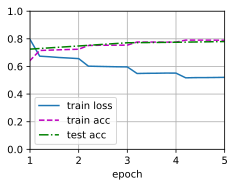

In [10]:

# 微调
train_ch13(net, 
           train_iter, 
           test_iter, 
           loss, 
           trainer, 
           num_epochs)

In [11]:
# 保存模型
net = net.to("cpu")

import datetime
import os
str_time = str(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
save_path = 'pretrain_BERT_classifier_%s.pt' % str_time
torch.save(net, save_path)  # 全保存
print("训练完毕, 模型 %s 已保存至当前路径" % save_path)

print("模型大小是: %0.2f M" % (os.path.getsize(save_path) / 1024 /1024))

训练完毕, 模型 pretrain_BERT_classifier_2023-06-29_13-10-20.pt 已保存至当前路径


In [16]:
import os
print("模型大小是: %0.2f M" % (os.path.getsize(save_path) / 1024 /1024))

模型大小是: 111.40 M
